In [135]:
#Importing required packages.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [136]:
#  Import and read the HR_Analytics.csv.
application_df = pd.read_csv("./DataFiles/HR_Analytics.csv")
final_results_all = []
application_df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


# Preprocessing: Remove Non-Beneficial Columns

In [137]:
# Create a dictionary with column names and their unique value counts
unique_counts = {col:application_df[col].nunique() for col in application_df.columns}

# Convert the dictionary to a DataFrame
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column Name', 'Unique Values'])

# Display the new DataFrame
print(unique_counts_df)

                 Column Name  Unique Values
0                      EmpID           1470
1                        Age             43
2                   AgeGroup              5
3                  Attrition              2
4             BusinessTravel              4
5                  DailyRate            886
6                 Department              3
7           DistanceFromHome             29
8                  Education              5
9             EducationField              6
10             EmployeeCount              1
11            EmployeeNumber           1470
12   EnvironmentSatisfaction              4
13                    Gender              2
14                HourlyRate             71
15            JobInvolvement              4
16                  JobLevel              5
17                   JobRole              9
18           JobSatisfaction              4
19             MaritalStatus              3
20             MonthlyIncome           1349
21                SalarySlab    

In [138]:
#make a copy of dataframe
a1pplication_df = application_df.copy()

print(a1pplication_df.shape)

(1480, 38)


In [139]:
# Identify columns with only one unique value
cols_to_drop = [col for col in a1pplication_df.columns if a1pplication_df[col].nunique() == 1]

# Drop these columns from the DataFrame
a1pplication_df.drop(cols_to_drop, axis=1, inplace=True)
a1pplication_df.shape

(1480, 35)

# Preprocessing: Removing Duplicate Rows

In [140]:
print(f'dataframe shape before duplicate removal: {application_df.shape}')
duplicates_removed_df = a1pplication_df.drop_duplicates()
print(f'dataframe shape after duplicate removal: {duplicates_removed_df.shape}')

dataframe shape before duplicate removal: (1480, 38)
dataframe shape after duplicate removal: (1473, 35)


# Preprocessing: Removing Duplicate EmpID Rows

In [141]:
print(f'dataframe shape after duplicate removal: {duplicates_removed_df.shape}')

# Create a dictionary with column names and their unique value counts
unique_counts = {col:duplicates_removed_df[col].nunique() for col in duplicates_removed_df.columns}

# Convert the dictionary to a DataFrame
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column Name', 'Unique Values'])

# Display the new DataFrame
print(unique_counts_df)

dataframe shape after duplicate removal: (1473, 35)
                 Column Name  Unique Values
0                      EmpID           1470
1                        Age             43
2                   AgeGroup              5
3                  Attrition              2
4             BusinessTravel              4
5                  DailyRate            886
6                 Department              3
7           DistanceFromHome             29
8                  Education              5
9             EducationField              6
10            EmployeeNumber           1470
11   EnvironmentSatisfaction              4
12                    Gender              2
13                HourlyRate             71
14            JobInvolvement              4
15                  JobLevel              5
16                   JobRole              9
17           JobSatisfaction              4
18             MaritalStatus              3
19             MonthlyIncome           1349
20                Salary

In [142]:
duplicates_removed_df.loc[duplicates_removed_df['EmpID'] == 'RM1465']

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
161,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,...,3,4,0,5,2,3,4,2,0,0.0
162,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,...,3,4,0,5,2,3,4,2,0,5.0


In [143]:
duplicates_removed_df.loc[duplicates_removed_df['EmpID'] == 'RM1466']

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
802,RM1466,36,36-45,No,Travel_Frequently,884,Research & Development,23,2,Medical,...,3,3,1,17,3,3,5,2,0,3.0
803,RM1466,36,36-45,No,Travel_Frequently,884,Research & Development,23,2,Medical,...,3,3,1,17,3,3,5,2,0,2.0


In [144]:
duplicates_removed_df.loc[duplicates_removed_df['EmpID'] == 'RM1467']

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
953,RM1467,39,36-45,No,Travel_Rarely,613,Research & Development,6,1,Medical,...,3,1,1,9,5,3,7,7,1,7.0
955,RM1467,39,36-45,No,Travel_Rarely,613,Research & Development,6,1,Medical,...,3,1,1,9,5,3,7,7,1,1.0


In [145]:
print(f'Shape of dataframe before removing duplicate EmpID rows: {duplicates_removed_df.shape}')

duplicates_EmpID_removed_df = duplicates_removed_df.loc[~duplicates_removed_df.index.isin([161, 803, 955])]

print(f'Shape of dataframe after removing duplicate EmpID rows: {duplicates_EmpID_removed_df.shape}')

Shape of dataframe before removing duplicate EmpID rows: (1473, 35)
Shape of dataframe after removing duplicate EmpID rows: (1470, 35)


# Preprocessing: Convert 2 valued columns to '1's and '0's

In [146]:
#Check to see if only 2 choices for 'Attrition' column
attrition1And0_df = duplicates_EmpID_removed_df.copy()
attrition1And0_df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [147]:
#Make another copy of df
a2pplication_df = attrition1And0_df.copy()
print(a2pplication_df.shape)
print(a2pplication_df.info())
a2pplication_df.head()

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1479
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1470 non-null   object 
 1   Age                       1470 non-null   int64  
 2   AgeGroup                  1470 non-null   object 
 3   Attrition                 1470 non-null   object 
 4   BusinessTravel            1470 non-null   object 
 5   DailyRate                 1470 non-null   int64  
 6   Department                1470 non-null   object 
 7   DistanceFromHome          1470 non-null   int64  
 8   Education                 1470 non-null   int64  
 9   EducationField            1470 non-null   object 
 10  EmployeeNumber            1470 non-null   int64  
 11  EnvironmentSatisfaction   1470 non-null   int64  
 12  Gender                    1470 non-null   object 
 13  HourlyRate                1470 non-null   int64  
 1

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,3,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,3,1,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,3,4,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,3,4,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,3,4,0,0,0,3,0,0,0,0.0


In [148]:
#Set 'Attrition' column to binary
a2pplication_df['Attrition'] = a2pplication_df['Attrition'].replace('No',"0")
a2pplication_df['Attrition'] = a2pplication_df['Attrition'].replace('Yes',"1")
a2pplication_df['Attrition'] = a2pplication_df['Attrition'].astype('int64')
print(a2pplication_df.shape)
print(a2pplication_df.info())
a2pplication_df.head()

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1479
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1470 non-null   object 
 1   Age                       1470 non-null   int64  
 2   AgeGroup                  1470 non-null   object 
 3   Attrition                 1470 non-null   int64  
 4   BusinessTravel            1470 non-null   object 
 5   DailyRate                 1470 non-null   int64  
 6   Department                1470 non-null   object 
 7   DistanceFromHome          1470 non-null   int64  
 8   Education                 1470 non-null   int64  
 9   EducationField            1470 non-null   object 
 10  EmployeeNumber            1470 non-null   int64  
 11  EnvironmentSatisfaction   1470 non-null   int64  
 12  Gender                    1470 non-null   object 
 13  HourlyRate                1470 non-null   int64  
 1

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,1,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,3,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,0,Travel_Rarely,812,Sales,10,3,Medical,...,3,1,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,1,Travel_Frequently,1306,Sales,5,3,Marketing,...,3,4,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,0,Non-Travel,287,Research & Development,5,2,Life Sciences,...,3,4,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,1,Non-Travel,247,Research & Development,8,1,Medical,...,3,4,0,0,0,3,0,0,0,0.0


# Create Model 1s

In [149]:
#Convert Categorical data to numeric with 'pd.get_dummies'
dummies = pd.get_dummies(a2pplication_df)
print(dummies.shape)
dummies.head()

(1470, 1533)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_10k-15k,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_No,OverTime_Yes
0,18,1,230,3,3,405,3,54,3,1,...,0,0,0,1,0,0,0,1,1,0
1,18,0,812,10,3,411,4,69,2,1,...,1,0,0,1,0,0,0,1,1,0
2,18,1,1306,5,3,614,2,69,3,1,...,1,0,0,1,0,0,0,1,0,1
3,18,0,287,5,2,1012,2,73,3,1,...,0,0,0,1,0,0,0,1,1,0
4,18,1,247,8,1,1156,3,80,3,1,...,0,0,0,1,0,0,0,1,1,0


In [150]:
#Replace all NaaN values with 0
dummies.fillna(0, inplace=True)
print(dummies.shape)
dummies.head()

(1470, 1533)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_10k-15k,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_No,OverTime_Yes
0,18,1,230,3,3,405,3,54,3,1,...,0,0,0,1,0,0,0,1,1,0
1,18,0,812,10,3,411,4,69,2,1,...,1,0,0,1,0,0,0,1,1,0
2,18,1,1306,5,3,614,2,69,3,1,...,1,0,0,1,0,0,0,1,0,1
3,18,0,287,5,2,1012,2,73,3,1,...,0,0,0,1,0,0,0,1,1,0
4,18,1,247,8,1,1156,3,80,3,1,...,0,0,0,1,0,0,0,1,1,0


In [151]:
#Separate Data into X and y
X = dummies.drop('Attrition', axis=1)
y = dummies['Attrition']

In [152]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    random_state=3,
                                                    stratify=y)

In [153]:
#Applying Standard scaling to get optimized result
scaler = StandardScaler()

In [154]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Random Forest Classifier Model1

In [155]:
#Use Random Forest Classifier Model
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_scaled, y_train)
prediction_rfc = rfc.predict(X_test_scaled)

In [156]:
#Classification Report
print(classification_report(y_test, prediction_rfc, digits=5))

              precision    recall  f1-score   support

           0    0.85359   1.00000   0.92101       309
           1    1.00000   0.10169   0.18462        59

    accuracy                        0.85598       368
   macro avg    0.92680   0.55085   0.55281       368
weighted avg    0.87706   0.85598   0.80295       368



In [157]:
#Confusion Matirix
print(confusion_matrix(y_test, prediction_rfc))

[[309   0]
 [ 53   6]]


In [158]:
#list which features with importance
importances = rfc.feature_importances_
importances_sorted = sorted(zip(rfc.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.03947198152405764, 'MonthlyIncome'),
 (0.03679392009821412, 'Age'),
 (0.03383479049746414, 'DailyRate'),
 (0.03348030463801848, 'TotalWorkingYears'),
 (0.03126970216394468, 'DistanceFromHome'),
 (0.031187470344346453, 'YearsAtCompany'),
 (0.03073859363336088, 'EmployeeNumber'),
 (0.028138118674019216, 'HourlyRate'),
 (0.028017369783937637, 'MonthlyRate'),
 (0.026174995201597096, 'YearsWithCurrManager')]

<Axes: title={'center': 'Feature Importances'}, ylabel='1'>

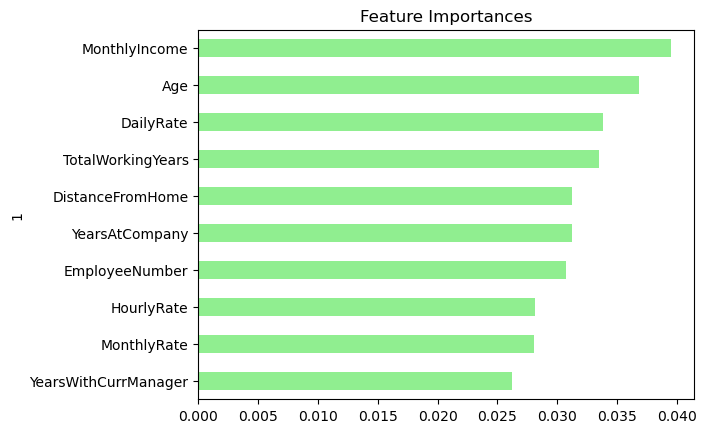

In [159]:
#Plot Importances
importances_df = pd.DataFrame(sorted(zip(rfc.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
top_ten_importances = importances_sorted.tail(10)
top_ten_importances.plot(kind='barh', color='lightgreen', title= 'Feature Importances', legend=False)

# Support Vector Model1

In [160]:
#Try Support Vector Model
from sklearn.svm import SVC

In [161]:
#Define model, train and predict
svc = SVC()
svc.fit(X_train_scaled, y_train)
prediction_svc = svc.predict(X_test_scaled)

In [162]:
#Classification report
print(classification_report(y_test, prediction_svc, digits=5))

              precision    recall  f1-score   support

           0    0.83967   1.00000   0.91285       309
           1    0.00000   0.00000   0.00000        59

    accuracy                        0.83967       368
   macro avg    0.41984   0.50000   0.45643       368
weighted avg    0.70505   0.83967   0.76650       368



c:\Users\T852\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T852\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\T852\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
#Confusion Matirix
print(confusion_matrix(y_test, prediction_svc))

[[309   0]
 [ 59   0]]


# Logistic Regression Model1

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [165]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [166]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [167]:
#Classification report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.84890   1.00000   0.91828       309
           1    1.00000   0.06780   0.12698        59

    accuracy                        0.85054       368
   macro avg    0.92445   0.53390   0.52263       368
weighted avg    0.87313   0.85054   0.79141       368



In [168]:
#Confusion Matirix
print(confusion_matrix(y_test, y_pred))

[[309   0]
 [ 55   4]]


# Preprocessing: Remove ID Columns

In [169]:
# Remove id column
print(a2pplication_df.shape)
remove_id_df = a2pplication_df.copy()
remove_id_df.drop(['EmpID'], axis=1, inplace=True)
remove_id_df.shape

(1470, 35)


(1470, 34)

In [170]:
# Remove id column
remove_id_df.drop(['EmployeeNumber'], axis=1, inplace=True)
remove_id_df.shape

(1470, 33)

# Create Model 2s

In [171]:
#Convert Categorical data to numeric with 'pd.get_dummies'
dummies2 = pd.get_dummies(remove_id_df)
print(dummies2.shape)
dummies2.head()

(1470, 62)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_10k-15k,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_No,OverTime_Yes
0,18,1,230,3,3,3,54,3,1,3,...,0,0,0,1,0,0,0,1,1,0
1,18,0,812,10,3,4,69,2,1,3,...,1,0,0,1,0,0,0,1,1,0
2,18,1,1306,5,3,2,69,3,1,2,...,1,0,0,1,0,0,0,1,0,1
3,18,0,287,5,2,2,73,3,1,4,...,0,0,0,1,0,0,0,1,1,0
4,18,1,247,8,1,3,80,3,1,3,...,0,0,0,1,0,0,0,1,1,0


In [172]:
#Replace all NaaN values with 0
dummies2.fillna(0, inplace=True)
print(dummies2.shape)
dummies2.head()

(1470, 62)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_10k-15k,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_No,OverTime_Yes
0,18,1,230,3,3,3,54,3,1,3,...,0,0,0,1,0,0,0,1,1,0
1,18,0,812,10,3,4,69,2,1,3,...,1,0,0,1,0,0,0,1,1,0
2,18,1,1306,5,3,2,69,3,1,2,...,1,0,0,1,0,0,0,1,0,1
3,18,0,287,5,2,2,73,3,1,4,...,0,0,0,1,0,0,0,1,1,0
4,18,1,247,8,1,3,80,3,1,3,...,0,0,0,1,0,0,0,1,1,0


In [173]:
#Separate Data into X and y
X = dummies2.drop('Attrition', axis=1)
y = dummies2['Attrition']

In [174]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    random_state=3,
                                                    stratify=y)

In [175]:
#Applying Standard scaling to get optimized result
scaler = StandardScaler()

In [176]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [177]:
print(f'X_train_scaled.shape: {X_train_scaled.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test_scaled.shape: {X_test_scaled.shape}')
print(f'y_test.shape: {y_test.shape}')
print(f'prediction_rfc.shape: {prediction_rfc.shape}')
# print(f'.shape: {}')
# print(f'.shape: {}')
# print(f'.shape: {}')

X_train_scaled.shape: (1102, 61)
y_train.shape: (1102,)
X_test_scaled.shape: (368, 61)
y_test.shape: (368,)
prediction_rfc.shape: (368,)


# Random Forest Classifier Model2

In [178]:
#Use Random Forest Classifier Model
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_scaled, y_train)
prediction_rfc = rfc.predict(X_test_scaled)

In [179]:
#Classification Report
print(classification_report(y_test, prediction_rfc, digits=5))

              precision    recall  f1-score   support

           0    0.85714   0.99029   0.91892       309
           1    0.72727   0.13559   0.22857        59

    accuracy                        0.85326       368
   macro avg    0.79221   0.56294   0.57375       368
weighted avg    0.83632   0.85326   0.80824       368



In [180]:
#Confusion Matirix
print(confusion_matrix(y_test, prediction_rfc))

[[306   3]
 [ 51   8]]


In [181]:
#list which features with importance
importances = rfc.feature_importances_
importances_sorted = sorted(zip(rfc.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.05979661237641018, 'MonthlyIncome'),
 (0.05221448343504453, 'Age'),
 (0.047254624388684385, 'DailyRate'),
 (0.04490736714314667, 'YearsAtCompany'),
 (0.044145605162289936, 'TotalWorkingYears'),
 (0.04248829377081791, 'DistanceFromHome'),
 (0.0417360546991377, 'HourlyRate'),
 (0.039423731801473634, 'MonthlyRate'),
 (0.03715270626980555, 'OverTime_Yes'),
 (0.03538405492446004, 'NumCompaniesWorked')]

<Axes: title={'center': 'Feature Importances'}, ylabel='1'>

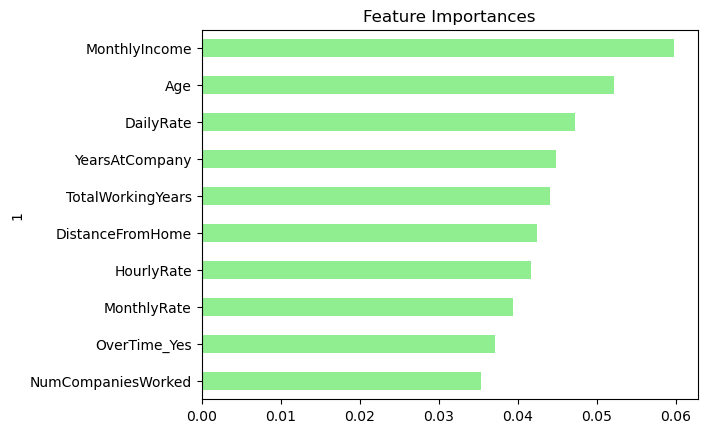

In [182]:
#Plot Importances
importances_df = pd.DataFrame(sorted(zip(rfc.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
top_ten_importances = importances_sorted.tail(10)
top_ten_importances.plot(kind='barh', color='lightgreen', title= 'Feature Importances', legend=False)

# Support Vector Model2

In [183]:
#Try Support Vector Model
from sklearn.svm import SVC

In [184]:
#Define model, train and predict
svc = SVC()
svc.fit(X_train_scaled, y_train)
prediction_svc = svc.predict(X_test_scaled)

In [185]:
#Classification report
print(classification_report(y_test, prediction_svc, digits=5))

              precision    recall  f1-score   support

           0    0.88034   1.00000   0.93636       309
           1    1.00000   0.28814   0.44737        59

    accuracy                        0.88587       368
   macro avg    0.94017   0.64407   0.69187       368
weighted avg    0.89953   0.88587   0.85796       368



In [186]:
#Confusion Matirix
print(confusion_matrix(y_test, prediction_svc))

[[309   0]
 [ 42  17]]


# Logistic Regression Model2

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [188]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [189]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [190]:
#Classification report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.90549   0.96117   0.93250       309
           1    0.70000   0.47458   0.56566        59

    accuracy                        0.88315       368
   macro avg    0.80274   0.71787   0.74908       368
weighted avg    0.87254   0.88315   0.87368       368



In [191]:
#Confusion Matirix
print(confusion_matrix(y_test, y_pred))

[[297  12]
 [ 31  28]]


# Conclusions

The Support Vector Model2 had the highest accuracy of 88.587% which was nearly identical in accuracy to Logistic Regression Model2 with an accuracy of 88.315%. The Random Forest Model2 had an accuracy of 85.326%.